In [1]:
push!(LOAD_PATH,pwd())
using ProfileView
using constants
using types10
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

kltSA (generic function with 1 method)

In [2]:
Eoff=5.0
Ts=collect(300.0:10.0:900.0)
######################################################################################
##for Liu x=0.6 best fit x=0.635 N=-1.45e20
######################################################################################
numofn=[-2.0e18]#,-1.22e18,-1.02e18,-0.94e18]#-9.5e19,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
numofnn=[1e17]#,1e18,1e18,1e18]
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
xs=[0.6]#,0.8,0.7,0.61]#collect(0.0:0.01:1.0)
Es=collect(0.0:0.1:3.0)

var0=[Ts[1],xs[1]]

EX3(var)=Eoff#+Egx3(var[1],var[2])
EX1(var)=Ec0(var[2])+EX3(var)
ELH(var)=Eoff-Egx3(var[1],var[2])
EHH(var)=Eoff-Egx3(var[1],var[2])

effMassX1(var)=X1effMass(var[1])*me
effMassX3(var)=0.38*me
effMassLH(var)=-1.0*me
effMassHH(var)=-1.5*me

alphaX1(var)=0.0#EX1(var0)
alphaX3(var)=0.0#EX1(var0)
alphaLH(var)=0.0#EX3(var0)
alphaHH(var)=0.0#EX3(var0)

function Da(band::parBandTx,x::Float64)
    Da=7.0#9.0-1.5*x*x
    Dv=1.0
    if band==bandX3 ||  band==bandX1
        return Da
    end
    if band==bandHH ||  band==bandLH
        return Dv
    end
end

bandX3=parBandTx(true,1.0,effMassX3(var0),alphaX3(0.0),EX3(var0),[EX3],[effMassX3],[alphaX3],var0)
bandX1=parBandTx(true,1.0,effMassX1(var0),alphaX1(0.0),EX1(var0),[EX1],[effMassX1],[alphaX1],var0)
bandHH=parBandTx(true,1.0,effMassHH(var0),alphaHH(0.0),EHH(var0),[EHH],[effMassHH],[alphaHH],var0)
bandLH=parBandTx(true,1.0,effMassLH(var0),alphaLH(0.0),ELH(var0),[ELH],[effMassLH],[alphaLH],var0)
bndstTx=BandStrucTx([bandLH,bandHH,bandX1,bandX1,bandX1,bandX3,bandX3,bandX3],var0)#
#bndstTx=BandStrucTx([bandLH,bandX1],var0)#

#vartau0=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandV]
vartau0=[bandX3.effMass,Ts[1],EX1(var0),xs[1],EX1(var0),bandX3,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandLH]
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst
#tauAC(var)=tauAC_func(Cl(var[4]),acPhDa(var[4]),var[2],var[1],var[3],var[6])
tauAC(var)=tauAC_func(Cl(var[4]),Da(var[6],var[4]),var[2],var[1],var[3],var[6])
tauPOP(var)=tauPOP_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1]
,var[3],tauPOPIIint(var[5],var[2],var[4],var[6]),var[7],opPhE(var[4]),var[8])
tauPOP2(var)=tauPOP2lowN_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauPOP3(var)=tauPOP3_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauII2(var)=tauII2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauNI(var)=tauNI_func(epsilon0_x(var[4]),var[1],var[9])
tauTOTTx=tau_electron_B([tauAC,tauII2,tauNI,tauPOP3],vartau0)#,tauII2,tauPOP2,tauPOP3

xmax=3.0

3.0

In [3]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis,sigmaes,sigmahs,seebeckes,seebeckhs)=electronicPropsiso(bndstTx,xs,Ts,numofn,numofnn,tauTOTTx,xmax)
x=3.0

 33.197231 seconds (188.61 M allocations: 38.890 GiB, 11.70% gc time)


3.0

In [4]:
foreach(x->println(Ts[x]," ",Efs[x,1,1,]-Eoff),1:length(Ts))

300.0 -0.05944102967435594
310.0 -0.06310866039023288
320.0 -0.06683883515482503
330.0 -0.07062923311579983
340.0 -0.07447726250565356
350.0 -0.07837984232604267
360.0 -0.08233307602043727
370.0 -0.08633178003179598
380.0 -0.09036882652682277
390.0 -0.09443426345527772
400.0 -0.09851419478524903
410.0 -0.10258945199555392
420.0 -0.10663418043458694
430.0 -0.11061461129310679
440.0 -0.1144884760636593
450.0 -0.11820567223030398
460.0 -0.12171075770598083
470.0 -0.12494746708927895
480.0 -0.12786468341628066
490.0 -0.13042247435041787
500.0 -0.13259647264703478
510.0 -0.13437940173053242
520.0 -0.13577965411536308
530.0 -0.13681782680530308
540.0 -0.13752250224849227
550.0 -0.1379263243247033
560.0 -0.13806283561434718
570.0 -0.13796447401947987
580.0 -0.1376613081053497
590.0 -0.1371804455950949
600.0 -0.13654587009109598
610.0 -0.13577853565351905
620.0 -0.13489659914658958
630.0 -0.1339157126326933
640.0 -0.13284932909072733
650.0 -0.13170899554561188
660.0 -0.13050462082675818
670.0 

In [5]:
plot(Ts,Efs[:,1,1]-Eoff,linestyle="-",marker="o",color="c")
#ylim(0,7)
grid()

MethodError: MethodError: no method matching -(::Array{Float64,1}, ::Float64)
Closest candidates are:
  -(!Matched::Float64, ::Float64) at float.jl:397
  -(!Matched::Complex{Bool}, ::Real) at complex.jl:298
  -(!Matched::Missing, ::Number) at missing.jl:93
  ...

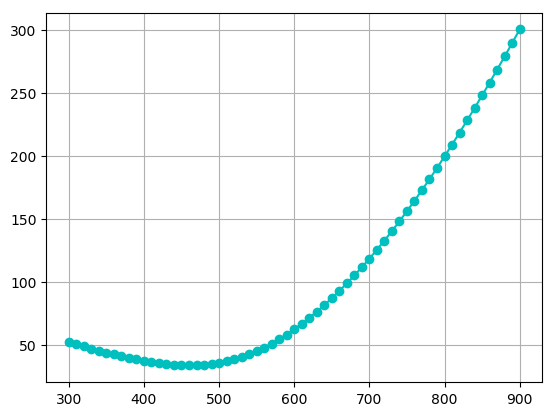

In [6]:
plot(Ts,sigmaes[:,1,1]/100,linestyle="-",marker="o",color="c")
#ylim(0,7)
grid()

In [7]:
Ts

61-element Array{Float64,1}:
 300.0
 310.0
 320.0
 330.0
 340.0
 350.0
 360.0
 370.0
 380.0
 390.0
 400.0
 410.0
 420.0
   ⋮  
 790.0
 800.0
 810.0
 820.0
 830.0
 840.0
 850.0
 860.0
 870.0
 880.0
 890.0
 900.0

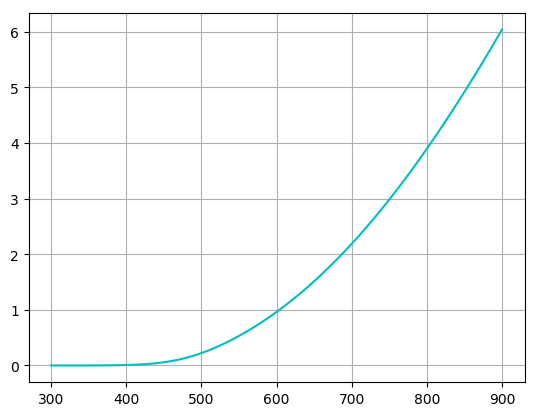

In [8]:
plot(Ts,kbis[:,1,1],linestyle="-",color="c")
#ylim(0,7)
grid()

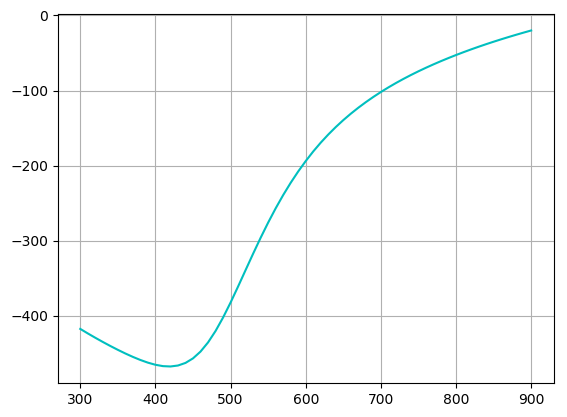

In [9]:
plot(Ts,seebecks[:,1,1]*1e6,linestyle="-",color="c")
#plot(Ts,seebeckes[:,1,1]*1e6,linestyle="-",color="y")
#plot(Ts,seebeckhs[:,1,1]*1e6,linestyle="-",color="k")
#ylim(-250,-0)
grid()

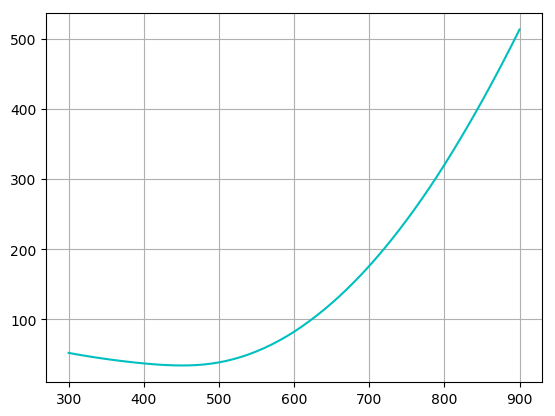

In [10]:
plot(Ts,sigmas[:,1,1]/100,linestyle="-",color="c")
#ylim(0,3500)
grid()

In [11]:
T_EF_Dict=Dict()
for (Ti,Tx) in enumerate(Ts)
    T_EF_Dict[Tx]=(Efs[Ti])    
end
T_EF_Dict_Array=Array{Dict{Float64,Float64},2}(undef,length(numofn),length(xs))
Dict_temp=Dict()
Efsr=Array{Float64,3}(undef,length(Ts),length(numofn),length(xs))
for (j,jn) in enumerate(numofn)
    for (k,kx) in enumerate(xs) 
        for (i,iT) in enumerate(Ts)
            Efsr[i,j,k]=Efs[i,j,k]-EX3(0.0)
            Dict_temp[iT]=Efsr[i,j,k]
            T_EF_Dict_Array[j,k]=Dict_temp 
        end
    end
end
#foreach(i->println("$i= ",Ts[i]),1:length(Ts))
#Efsr

In [12]:
#println("-1")
#############Lattice Thermal Conductivity Parameters###############

function klpar(con::Float64,p::Float64,NP::Float64)
    thetaL=52.3e12*hbar/kB # K 
    thetaT=29.7e12*hbar/kB  # K
    vL=(1-con)*7700+con*4900    # m/s
    vT=(1-con)*4900+con*3000    # m/s
    gammaL=2.5*(1-con)+1.7*con
    gammaT=2.5*(1-con)+1.7*con
    M=(2*(24.305e-3)+(28.0855e-3*(1-con)+118.71e-3*con))/3/Nav
    V=((1-con)*(6.39e-10)^3+con*(6.77e-10)^3)/12
    a=V^(1.0/3.0)
    ro=M/V
    Vdj=(((6.39e-10)^3)/((1-con)*(6.39e-10)^3+con*(6.77e-10)^3))^(1/3)
    jL=vL/7700*Vdj
    jT=vT/4900*Vdj
    thetaLx=thetaL*jL
    thetaTx=thetaT*jT
    ##########Boundary Scattering###############3
    D=11e-9
    #p=1.0
    ##########Alloy Scattering###################
    mbar=(28.0855*(1-con)+118.71*con)
    GammaSiSn=(1-con)*((28.0855-mbar)/mbar)^2+con*((118.71-mbar)/mbar)^2
    GammaMgSiSn=2*((mbar/(24.305+mbar))^2*GammaSiSn);         
    ##########Electron Scattering###################
    Eep=5.0*q
    xsp=xs[1]
    Tp=300.0
    mdx1=0.67*me
    mdx3=0.38*me
    Efx3=0.2589
    Efx1=0.2589
    ##########Nanoparticle Scattering###################
    #NP=0
    #alpha=1.0
    Rnp=1/2*15.0e-9#
    Vnp=4/3*pi*(Rnp)^3
    rhonp=NP/100/Vnp
    rhoM=3.0
    rhoT=3.78
    alphaNP=0.2289#1-exp(-1*(rhoT-rhoM)/rhoM);
#vartauPH0=[[0.02],Ts[1],gammaL,gammaT,xsp,thetaCLx,thetaCTx,thetaCTx,MSi,MGe,VSi,a,T_EF_Dict,0.0]
    Tsindex=1#25
    numberofnindex=1
    xsindex=1
    vartauPH0=[ [0.02],  Ts[1],   gammaL,  gammaT, con,#5
        thetaLx, thetaTx, thetaTx, M,   M, #10
        V, a, T_EF_Dict_Array, Eep, alphaNP, #15
        Rnp, thetaLx, thetaTx, vL, vT, #20
        vL, vT, p, NP,Tsindex,#25
        numberofnindex,xsindex,p,D,GammaMgSiSn,#30
        mdx1,mdx3,Efx1,Efx3,ro,#35,
        NP,alphaNP,Rnp,Vnp,rhonp #40
        ]  
    thetaCLx=thetaCL(vartauPH0[12],vartauPH0[5],vartauPH0[17],vartauPH0[19],vartauPH0[11])
    thetaCTx=thetaCT(vartauPH0[12],vartauPH0[5],vartauPH0[18],vartauPH0[19],vartauPH0[11])
    #println("2")
    tauPHNLf(var)=tauPH_NL(var[3],var[11],var[1],var[2],var[9],var[21])
    tauPHNTf(var)=tauPH_NT(var[4],var[11],var[1],var[2],var[9],var[22]) 

    tauPHULf(var)=tauPH_U(var[3],var[1],var[2],var[9],var[19],var[17])
    tauPHUTf(var)=tauPH_U(var[4],var[1],var[2],var[9],var[20],var[18])

    tauPHALLLf(var)=tauPH_ALL(var[30],var[11],var[1],var[2],var[19])
    tauPHALLTf(var)=tauPH_ALL(var[30],var[11],var[1],var[2],var[20])

    tauPHeLfX3(var)=tauPH_e(var[14],var[32],var[35],(var[13][var[26],var[27]])[var[2]],var[1],var[2],var[21])
    tauPHeTfX3(var)=tauPH_e(var[14],var[32],var[35],(var[13][var[26],var[27]])[var[2]],var[1],var[2],var[22])

    tauPHeLfX1(var)=tauPH_e(var[14],X1effMass(var[2])*me,var[35],(var[13][var[26],var[27]])[var[2]]-Ec0(0.6)
        ,var[1],var[2],var[21])
    tauPHeTfX1(var)=tauPH_e(var[14],X1effMass(var[2])*me,var[35],(var[13][var[26],var[27]])[var[2]]-Ec0(0.6)
        ,var[1],var[2],var[22])

    tauPHBLf(var)=tauPH_B(var[19],var[28],var[29])
    tauPHBTf(var)=tauPH_B(var[20],var[28],var[29])
    #println("3")

    tauPHNPLf(var)=tauPH_NP(var[37],var[40],var[38],var[1],var[2],var[19])
    tauPHNPTf(var)=tauPH_NP(var[37],var[40],var[38],var[1],var[2],var[20])

    tauPHTOTL=tau_phonon_B([tauPHNLf,tauPHULf,tauPHBLf,tauPHALLLf,tauPHeLfX3,tauPHeLfX1,tauPHNPLf],vartauPH0)#,tauPHNPLf,tauPHALLLf,tauPHeLf,tauPH_eLf ,tauPHALLLf ,tauPHBLf,,tauPHULf
    tauPHNL=tau_phonon_B([tauPHNLf],vartauPH0)
    tauPHRL=tau_phonon_B([tauPHULf,tauPHBLf,tauPHALLLf,tauPHeLfX3,tauPHeLfX1,tauPHNPLf],vartauPH0) #,tauPHNPLf,tauPHALLLf,tauPHeLf,tauPHALLLf,tauPH_eLf] ,tauPHBLf

    tauPHTOTTx=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHBTf,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf ,tauPHBTf
    tauPHNTx=tau_phonon_B([tauPHNTf],vartauPH0)
    tauPHRTx=tau_phonon_B([tauPHUTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHBTf,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf ,tauPHBTf#

    tauPHTOTTy=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHBTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf tauPHBTf
    tauPHNTy=tau_phonon_B([tauPHNTf],vartauPH0)
    tauPHRTy=tau_phonon_B([tauPHUTf,tauPHBTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPH_eTf ,tauPHBTf,tauPHALLTf,tauPHeTf
    #println("4")
    tauPHL=[tauPHTOTL,tauPHNL,tauPHRL]
    tauPHTx=[tauPHTOTTx,tauPHNTx,tauPHRTx]
    tauPHTy=[tauPHTOTTx,tauPHNTx,tauPHRTx]
    return (vartauPH0,tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,tauPHL,tauPHTx,tauPHTy)
end
xmax=1.0

1.0

In [13]:
(vartauPH0,tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,tauPHL,tauPHTx,tauPHTy)=klpar(0.6,0.65,2.0)
klsM=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
for (iT,iTx) in enumerate(Ts)    
   (IL1,ITx1,IL2,ITx2,IL3,ITx3,kL,kTx,kTy,klsM[iT,1,1])= klt(tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,
        tauPHRTy,iTx,[vartauPH0[21],vartauPH0[22],vartauPH0[22]])
    #println("T=", iTx, " kl= " ,round(klsM[iT,1,1]*10000)/10000)
   # println("IL1= ",IL1," IL2= ",IL2," IL3= ",IL3," ITx1= ",ITx1," ITx2= ",ITx2," ITx3= ",ITx3," kL/3=",kL,    " kTx/3=",kTx," kTy/3=",kTy)
end

In [14]:
foreach(x->println(klsM[x,1,1]),1:length(Ts))

0.8480913505997609
0.8317153702654894
0.8159585293291957
0.8008117728520148
0.7862634825262824
0.7722999965438196
0.7589060336135224
0.7460650466595405
0.7337595233454758
0.721971244822532
0.710681510293501
0.6998713325660363
0.6895216083094375
0.6796132658967027
0.6701273932367139
0.661045347643168
0.6523488493547008
0.64402005973912
0.6360416446273569
0.6283968229771556
0.6210694014467504
0.6140437963321057
0.6073050451365639
0.6008388102899229
0.5946313771766807
0.588669647961099
0.5829411319662521
0.5774339335868833
0.5721367376808827
0.5670387930482271
0.5621298943150156
0.5574003625851195
0.5528410252051332
0.5484431949589744
0.5441986489715608
0.5400996075612337
0.5361387132414717
0.5323090100359656
0.5286039232383533
0.5250172397191708
0.5215430888577922
0.5181759241561087
0.5149105055729877
0.5117418826038697
0.508665378117732
0.5056765729538001
0.5027712912724165
0.4999455866481821
0.4971957288885289
0.49451819155710997
0.4919096401785863
0.48936692109937113
0.486887050977564

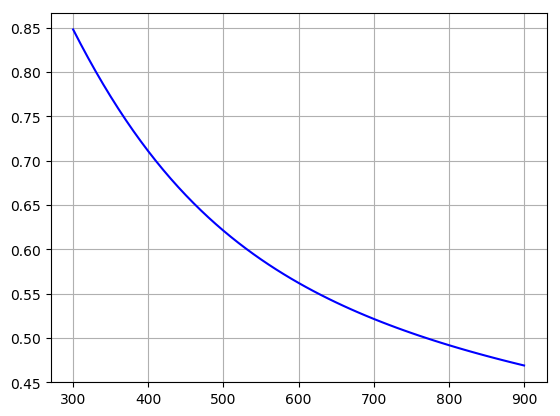

In [15]:
plot(Ts,klsM[:,1,1],linestyle="-",color="b")
grid()

In [16]:
(vartauPH0,tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,tauPHL,tauPHTx,tauPHTy)=klpar(0.0,0.65,2.0)
kls0=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
for (iT,iTx) in enumerate(Ts)    
   (IL1,ITx1,IL2,ITx2,IL3,ITx3,kL,kTx,kTy,kls0[iT,1,1])= klt(tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,iTx,[vartauPH0[21],vartauPH0[22],vartauPH0[22]])
    #println("T=", iTx, " kl= " ,round(kls0[iT,1,1]*10000)/10000)
    #println("IL1= ",IL1," IL2= ",IL2," IL3= ",IL3," ITx1= ",ITx1," ITx2= ",ITx2," ITx3= ",ITx3," kL/3=",kL,    " kTx/3=",kTx," kTy/3=",kTy)
end

In [17]:
foreach(x->println(kls0[x,1,1]),1:length(Ts))

5.661630516632574
5.521243711174546
5.386134251800818
5.256160292255135
5.131159929605507
5.010958440607731
4.895373756092201
4.784220578848285
4.677313456158717
4.574469046458188
4.4755077649990875
4.380254951772025
4.28854167315886
4.2002052445253
4.115089542271333
4.033045159063132
3.9539294435569716
3.8776064548243716
3.8039468518203052
3.732827730744832
3.664132419467205
3.597750238270996
3.533576237856981
3.471510926092439
3.411459993388949
3.3533340434403844
3.297048332179964
3.242522518826837
3.1896804269997827
3.138449817110105
3.088762169582024
3.0405524786736144
2.9937590566686496
2.9483233481976967
2.9041897544218642
2.861305466781275
2.8196203099786583
2.7790865938415705
2.7396589736862267
2.701294318792666
2.6639515885945824
2.627591716186631
2.5921774987563553
2.557673494556201
2.524045926042233
2.4912625888194864
2.4592927660486863
2.4281071479847904
2.3976777563339478
2.367977873131863
2.338981973862806
2.3106656645543704
2.2830056225986985
2.2559795410657064
2.2295660

In [18]:
(vartauPH0,tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,tauPHL,tauPHTx,tauPHTy)=klpar(1.0,0.5,2.0)
kls1=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
for (iT,iTx) in enumerate(Ts)    
   (IL1,ITx1,IL2,ITx2,IL3,ITx3,kL,kTx,kTy,kls1[iT,1,1])= klt(tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,iTx,[vartauPH0[21],vartauPH0[22],vartauPH0[22]])
   # println("T=", iTx, " kl= " ,round(kls1[iT,1,1]*10000)/10000)
   # println("IL1= ",IL1," IL2= ",IL2," IL3= ",IL3," ITx1= ",ITx1," ITx2= ",ITx2," ITx3= ",ITx3," kL/3=",kL,    " kTx/3=",kTx," kTy/3=",kTy)
end

In [19]:
foreach(x->println(kls1[x,1,1]),1:length(Ts))

3.269426802556362
3.219033396902935
3.169892062558334
3.1219904245845296
3.075310171194779
3.0298285837932255
2.9855197347313465
2.942355425636783
2.900305922282694
2.8593405292563463
2.8194280380898196
2.7805370752741396
2.742636371144218
2.705694966578784
2.669682371434494
2.634568686211512
2.6003246961430713
2.5669219442957534
2.534332787348902
2.502530435161141
2.471488974063291
2.441183374483367
2.4115894852291735
2.3826840181113162
2.3544445267841336
2.3268493827760843
2.2998777499535294
2.273509559700168
2.2477254855961495
2.222506918437828
2.1978359414575395
2.1736953057672195
2.150068406076883
2.12693925675848
2.104292468333098
2.0821132244568843
2.060387259472328
2.039100836579847
2.018240726671999
1.9977941878607044
1.977748945716946
1.9580931742331655
1.9388154775105724
1.919904872167294
1.901350770457997
1.8831429640915915
1.8652716087304475
1.8477272091522743
1.8305006050539498
1.8135829574755746
1.7969657358221662
1.7806407054600577
1.7645999158649506
1.7488356892986727


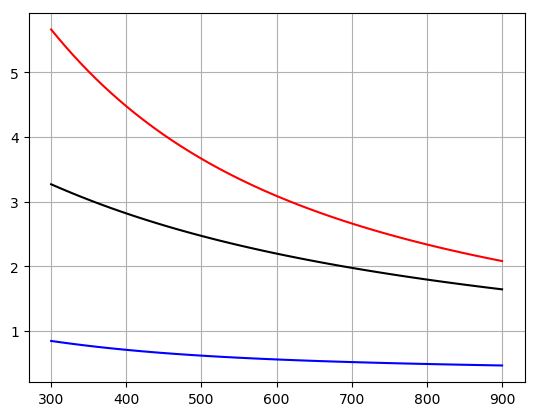

In [20]:
plot(Ts,klsM[:,1,1],linestyle="-",color="b")
plot(Ts,kls0[:,1,1],linestyle="-",color="r")

plot(Ts,kls1[:,1,1],linestyle="-",color="k")
grid()

In [21]:
yaa=0.6
aMgSi=6.39e-10
aMgSn=6.77e-10

6.77e-10

In [22]:
ks=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
klsT=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
f=0.35
for (iT,iTx) in enumerate(Ts)  
    klsT[iT,1,1]=(1-f)*klsM[iT,1,1]+f*(kls1[iT,1,1]*(1-yaa)aMgSn^3/((1-yaa)*aMgSn^3+yaa*aMgSi^3)+kls0[iT,1,1]*(yaa)aMgSi^3/((1-yaa)*aMgSn^3+yaa*aMgSi^3))
       ks[iT,1,1]=klsT[iT,1,1]+kes[iT,1,1]+kbis[iT,1,1,] 
    #println("T=", iTx, " kl= " ,round(klsT[iT,1,1]*10000)/10000)
    #println("IL1= ",IL1," IL2= ",IL2," IL3= ",IL3," ITx1= ",ITx1," ITx2= ",ITx2," ITx3= ",ITx3," kL/3=",kL,    " kTx/3=",kTx," kTy/3=",kTy)
end

In [23]:
MgSn_KL_T=[303.381209787804   ,404.509621648526   ,508.944674606021   ,609.64854815216    ,715.169193157614]
MgSn_KL_K=[ 7.16256157635468, 5.26108374384236, 4.14778325123153, 3.38916256157635, 2.89655172413793]

5-element Array{Float64,1}:
 7.16256157635468
 5.26108374384236
 4.14778325123153
 3.38916256157635
 2.89655172413793

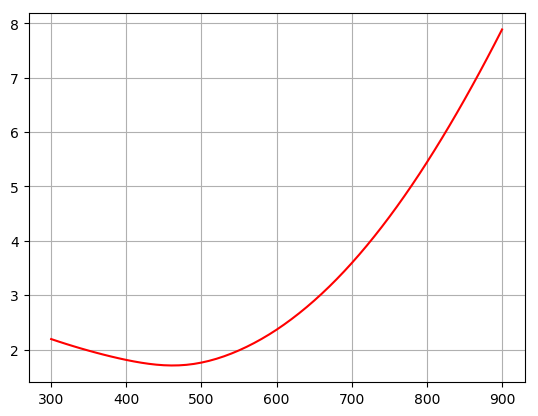

In [24]:
figure()
#semilogy(Ts,kls[:,1,1],linestyle="-",color="c")
#plot(Ts,kls0[:,1,1],linestyle="-",color="b")
#plot(Ts,kls1[:,1,1],linestyle="-",color="c")
#plot(Ts,klsM[:,1,1],linestyle="-",color="k")
plot(Ts,klsT[:,1,1]+kes[:,1,1]+kbis[:,1,1],linestyle="-",color="r")
#ylim(0,4.5)
grid(true)
#kes,kees,kehs,kbis

In [25]:
MgSiSn4hECE=[10,12.4,20.5,35.8,43.2,69.6,82.8,100,110]
MgSiSn2hECE=[3,4.4,8.5,15.8,22.2,55.6,50.8,68,80]
MgSiSn1hECE=[2,4.2,3.7,11.8,22.2,25.6,30.8,48,64]
MgSiSn0hECE=[1.6,1.7,3.8,7.8,12.2,25.6,40.8,68,62]

9-element Array{Float64,1}:
  1.6
  1.7
  3.8
  7.8
 12.2
 25.6
 40.8
 68.0
 62.0

In [26]:
MgSiSn4hKCT=[27.204980536447565,125.22263104569937,250.3986028902043, 300.61256865568174,350.4225990508186, 400.31661600810537,
450.60323681544304,500.88852450274595,550.37460672959,]
MgSiSn4hKCK=[ 2.8789473684210525, 2.7375, 2.609210526315789, 2.5121710526315786, 2.4184210526315786, 2.531907894736842, 2.614144736842105
, 2.6930921052631573, 2.7999999999999994]
MgSiSn2hKCT=[27.174994546327184, 125.66321921825845, 250.56521889830958, 300.8030294412153, 350.04276302458277,400.3366068836394, 
450.6409643790327, 500.95101524496823,550.7594666065552]
MgSiSn2hKCK=[2.608956937799043, 2.4846513157894736, 2.4523355263157893, 2.3861330409356722, 2.3131756578947367
, 2.385235380116959, 2.4832374999999995, 2.595288011695906, 2.697641746411483]
MgSiSn05hKCT=[26.1867119039,124.6184700145,249.7991072943,300.1809590466,349.8324946796,399.3641637338,450.1016014407,
450.7811561579,549.7232004091,500.4092678505]
MgSiSn05hKCK=[2.4217028509,2.3627326555,2.2459551435,2.1025076754,2.0223385167,2.2370652412,2.3803594498,2.302875,
2.5966549043,2.5105263158]
MgSiSn2h2TiO2KCT=[450.7811561579,26.5677491601,125.429931211,250.6172345758,300.4185996907,350.6278995361,
400.1639737642,500.3759398496,550.2639577668]
MgSiSn2h2TiO2KCK=[2.302875,2.3065789474,2.2490131579,2.1486842105,2.0335526316,1.925,2.1552631579,2.4282894737,
2.5269736842]
MgSiSn2h5TiO2KCT=[27.3549565403,124.5907321495,250.1753052845,299.9806697595,350.1926358449,400.1339785634,
450.0339945609,500.3299472084,550.6152348958]
MgSiSn2h5TiO2KCK=[2.2490131579,2.1782894737,2.0582236842,1.9529605263,1.8509868421,2.08125,2.2095394737,2.3148026316,
2.39375]
MgSiSn0hKCT=[26.9755694846,125.1437396683,250.3474884019,300.0735322348,349.8027683571,400.6191835973,449.916314723,
500.2366154749,550.052698235]
MgSiSn0hKCK=[2.1168755981,2.0268355263,1.9150855263,1.8140986842,1.7209888158,1.8544934211,1.9231644737,2.0605065789,
2.1816907895]

9-element Array{Float64,1}:
 2.1168755981
 2.0268355263
 1.9150855263
 1.8140986842
 1.7209888158
 1.8544934211
 1.9231644737
 2.0605065789
 2.1816907895

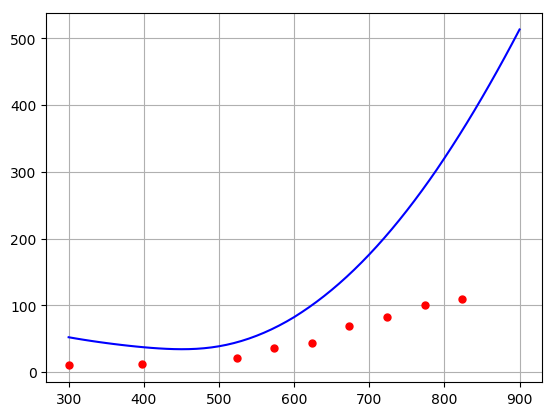

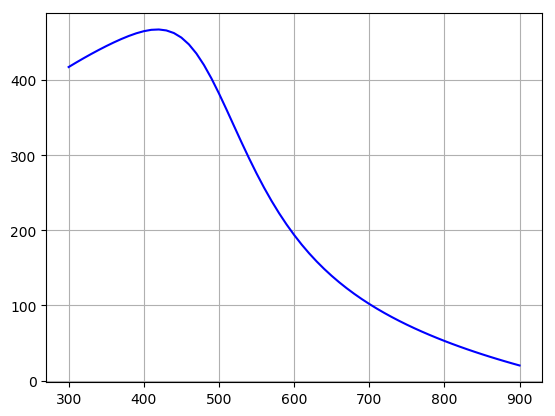

In [27]:

figure()
plot(Ts,sigmas[:,1,1]/100,linestyle="-",color="b")
#plot(Ts,sigmas[:,2,2]/100/6^(2/3),linestyle="-",color="r")
#plot(Ts,sigmas[:,3,3]/100/6^(2/3),linestyle="-",color="k")
#plot(Ts,sigmas[:,4,4]/100/6^(2/3),linestyle="-",color="g")
plot(MgSiSn4hKCT .+273,MgSiSn4hECE,linestyle="None",marker=".",markersize=10,color="r")
#plot(MgSiSn4hKCT .+273,MgSiSn2hECE,linestyle="None",marker=".",markersize=10,color="k")
#plot(MgSiSn4hKCT .+273,MgSiSn1hECE,linestyle="None",marker=".",markersize=10,color="b")
#plot(MgSiSn4hKCT .+273,MgSiSn0hECE,linestyle="None",marker=".",markersize=10,color="g")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Green_EC_E/100,linestyle="None",marker="x",markersize=2,color="g")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Blue_EC_E/100,linestyle="None",marker="o",markersize=2,color="b")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Pink_EC_E/100,linestyle="None",marker="o",markersize=2,color="r")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Black_EC_E/100,linestyle="None",marker="o",markersize=2,color="k")
grid()

figure()
plot(Ts,-seebecks[:,1,1]*1e6,linestyle="-",color="b")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="r")
#plot(Ts,-seebecks[:,3,3]*1e6,linestyle="-",color="k")
#plot(Ts,-seebecks[:,4,4]*1e6,linestyle="-",color="g")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="b")
#plot(SiGe_Vin_162_Bulk_SC_T,SiGe_Vin_162_Bulk_SC_S,linestyle="None",marker=".",markersize=10,color="r")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Green_SC_S,linestyle="None",marker="x",markersize=2,color="g")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Blue_SC_S,linestyle="None",marker="x",markersize=2,color="b")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Pink_SC_S,linestyle="None",marker="x",markersize=2,color="r")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Black_SC_S,linestyle="None",marker="x",markersize=2,color="k")
grid()

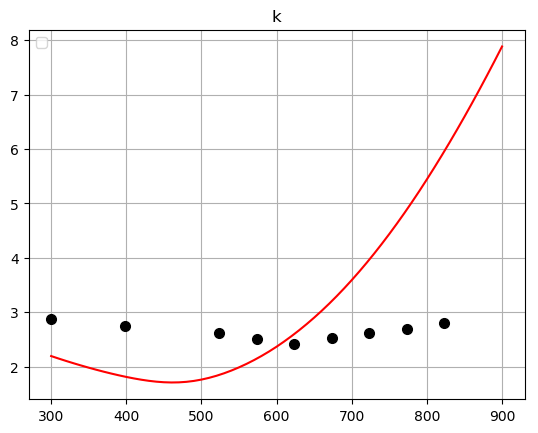

No handles with labels found to put in legend.


In [28]:
figure()
title("k")
plot(Ts,klsT[:,1,1]+kes[:,1,1]+kbis[:,1,1],linestyle="-",color="r")
#plot(Ts,klsT[:,1,1]+kes[:,1,1]+kbis[:,1,1],linestyle="-",color="r")
#plot(Ts,klsT[:,1,1]+kes[:,1,1]+kbis[:,1,1],linestyle="-",color="r")
#plot(Ts,klsT[:,1,1]+kes[:,1,1]+kbis[:,1,1],linestyle="-",color="r")
plot(MgSiSn4hKCT .+273,MgSiSn4hKCK,linestyle="None",marker="o",markersize=7,color="k")
#plot(MgSiSn2hKCT .+273,MgSiSn2hKCK,linestyle="None",marker="^",markersize=7,color="b")
#plot(MgSiSn05hKCT .+273,MgSiSn05hKCK,linestyle="None",marker="D",markersize=7,color="g")
#plot(MgSiSn2h2TiO2KCT  .+273,MgSiSn2h2TiO2KCK,linestyle="None",marker="8",markersize=7,color="tab:pink")
#plot(MgSiSn2h5TiO2KCT .+273,MgSiSn2h5TiO2KCK,linestyle="None",marker="*",markersize=7,color="tab:purple")
#plot(MgSiSn0hKCT .+273,MgSiSn0hKCK,linestyle="None",marker="s",markersize=7,color="r",label="4 h")
#plot(SiGe_SA_162_Bulk_KC_T,SiGe_SA_162_Bulk_KC_KL,linestyle="None",marker="o",markersize=7,color="b")
#plot(SiGe_SA_162_Bulk_KC_T2,SiGe_SA_162_Bulk_KC_K2,linestyle="None",marker="o",markersize=7,color="g")
legend(loc="upper left")
#ylim(1.5,5.0)
grid()

In [29]:
Ts

61-element Array{Float64,1}:
 300.0
 310.0
 320.0
 330.0
 340.0
 350.0
 360.0
 370.0
 380.0
 390.0
 400.0
 410.0
 420.0
   ⋮  
 790.0
 800.0
 810.0
 820.0
 830.0
 840.0
 850.0
 860.0
 870.0
 880.0
 890.0
 900.0

In [30]:
foreach(x->println(ks[x,1,1]),1:length(Ts))

2.1928344876797095
2.1469019968705725
2.102592369984007
2.0598960810016327
2.0188094751926773
1.9793429895454322
1.9415310531014955
1.9054441344362483
1.8712032206009728
1.8389966230638584
1.8090982675884966
1.7818853654553046
1.75786073334024
1.7376329267912758
1.7219154286129554
1.7114843795792016
1.7071027443988978
1.7094309501621496
1.7189421369203712
1.7358720611989433
1.7602230989159027
1.7918187673830543
1.830384502161703
1.8756252861835687
1.9272807596291406
1.985153043715559
2.049111994889056
2.119088299385405
2.1950602440285443
2.2770398960750384
2.365060966181031
2.460189549869887
2.560965406295935
2.6677503844591577
2.7806804929855127
2.8998263181872908
3.025236482356784
3.1569460488931513
3.2949791543780567
3.4393501560747346
3.5900643205214537
3.747118358345828
3.910500905734194
4.080192986192008
4.256168462853768
4.4383944833382545
4.626831916420991
4.82143577912232
5.022155652857281
5.228936087552806
5.442723957165634
5.661807535937472
5.886610037530793
6.11713402299345

In [31]:
foreach(x->println(sigmas[x,1,1]/100),1:length(Ts))

52.3103370157488
50.360890398234204
48.52451985697692
46.7932242436255
45.16041298485509
43.621076186195175
42.17206225307479
40.81248292013864
39.5442614269132
38.37282885283163
37.30795147767037
36.364632224283135
35.57225141624408
34.952811621214195
34.53895916982235
34.372325646531436
34.49769032555428
34.96061597658175
35.803971344775285
37.06467433430115
38.77157896224931
40.94497292569153
43.59753179061784
46.73613583144993
50.36387355967083
54.48176286119717
59.090062081611705
64.1889761018985
69.77907286082251
75.86141931013864
82.43756239514033
89.68471109541525
97.34272155770219
105.46989760427203
114.08442069777415
123.1937289708995
132.802354392324
142.9134966548366
153.52951229477
164.65210033440556
176.28238227333117
188.420941146423
201.06784427666338
214.22265997049868
227.8844726005054
242.05189798284837
256.72309979034475
271.895807192494
287.56733365749307
303.73459673849106
320.5621409520039
337.77119959969536
355.4399969662374
373.5763977620472
392.1803053613686
4

In [32]:
foreach(x->println(-seebecks[x,1,1]*1e6),1:length(Ts))

417.47138417689484
423.4652896473618
429.25608082690843
434.8407058969002
440.20954059698835
445.3425805201018
450.2041672629103
454.7358980060732
458.8474741115636
462.4055558397121
465.2213695356057
467.0390676112311
467.5007446149665
466.22575821751974
462.77645384576937
456.71130121048407
447.67760965355234
435.50283684337603
420.27168135258734
402.35219546103025
382.35164917560274
361.01451165713905
339.10045809182395
317.2826837462227
296.0888690036768
275.8852246471601
256.89127847830304
239.2086742884196
222.85357513604566
207.78539666340268
193.92945210729252
181.12450317159113
169.38734582545948
158.58796526079763
148.62367033555458
139.4046192484537
130.85060812180413
122.89025196682694
115.46032166769014
108.50502959071538
101.97528256517417
95.82794272732387
90.02512635455079
84.53355810658528
79.32398842389765
74.37067545541794
69.65092904770039
65.14471223697069
60.83429473183527
56.703952623995086
52.72411151950348
48.90877029420018
45.23860885239143
41.70229539098532
3

In [33]:
foreach(x->println(kes[x,1,1]),1:length(Ts))

0.03023141992357346
0.030118567548337895
0.029974171873603996
0.029803468397784652
0.02961151834581511
0.029403484598511477
0.029185012397529807
0.028962742167768476
0.02874498283261993
0.028542568915883994
0.028369908523649914
0.028246194724691764
0.028203510198724455
0.028270075126207342
0.028484975585579053
0.02889790361713526
0.029564832371057878
0.03054616285553513
0.031903492562390154
0.033696126248101824
0.035978278160007274
0.03879762165609858
0.042195286032495366
0.04620690685326273
0.050864137955566074
0.05619613612150129
0.06223081901039035
0.06899562273332233
0.07651801218908716
0.08482571651154586
0.0939467956771583
0.1041694381255569
0.11514336659987157
0.1269743944859818
0.13971294699866466
0.15339441811115206
0.16805029165165453
0.1837103499615732
0.2004033478547127
0.21815725597978908
0.23699935224677904
0.2569562527874545
0.2780539177110175
0.3003176467235775
0.3237720714671761
0.34844114778191204
0.3743481493656735
0.40151566345099043
0.42996558868782087
0.4597191352

In [34]:
foreach(x->println(kbis[x,1,1]),1:length(Ts))

2.9568410821642e-5
6.084915697537923e-5
0.0001200427245790142
0.00022788039872273063
0.00041763963652188894
0.0007411011315819092
0.0012765387177046867
0.002139074983617307
0.003493577987332528
0.00556991045847551
0.008679635095397901
0.01323206542651358
0.019748172255186623
0.028857239134374612
0.04128115382154995
0.05779227837693187
0.07914185687507329
0.10597245385334242
0.13873640804440213
0.17764921910333945
0.22269636235534904
0.2736892924458805
0.33034626788158084
0.3923689831289844
0.4594962246570228
0.5315302703430289
0.6083409469006593
0.6898580271656759
0.7760575506095068
0.8669478267756654
0.9625572895704534
1.0636854977382317
1.1692430629222088
1.27950557301705
1.3945771924383765
1.514510773017758
1.6393402389765872
1.7690868291384556
1.9037610987379971
2.0433638652033888
2.1878868449468025
2.3373131948579915
2.491618023725283
2.6507688922110644
2.8147263048509488
2.983444192939687
3.1568703861748166
3.334947071111917
3.517611234964166
3.704795093756349
3.897085073930913
4

In [35]:
foreach(x->println(klsT[x,1,1]),1:length(Ts))

2.1625734993453145
2.116722580165259
2.072498155385824
2.0298647322051253
1.9887803172103402
1.949198403815339
1.911069501986261
1.8743423172848626
1.8389646597810203
1.804884143689499
1.7720487239694487
1.7404071053040993
1.709909050886329
1.6805056125306939
1.6521492992058266
1.6247941975851345
1.5983960551527667
1.572912333453272
1.5483022363135788
1.524526715847502
1.5015484584005463
1.4793318532810753
1.4578429482476265
1.4370493962013218
1.4169203970165518
1.3974266372510287
1.3785402289780062
1.3602346494864066
1.3424846812299502
1.325266352787827
1.3085568809334194
1.2923346140060983
1.276578976773855
1.2612704169561262
1.2463903535484715
1.2319211270583805
1.2178459517285423
1.2041488697931226
1.1908147077853468
1.1778290348915565
1.165178123327872
1.1528489107003823
1.1408289642978937
1.1291064472573662
1.117670086535643
1.1065091426166556
1.0956133808805006
1.0849730445594128
1.0745788292052945
1.0644218585940597
1.0544936619932574
1.0447861527211841
1.0352916079278391
1.026